# Functions, Scope, Classes and Standard Lib

## Writing Our Own Functions
We have already seen how to use existing functions; built-in functions such as `print` or `sorted`, or methods such as `append` on lists.

It turns out we can also easily write our own functions. This is extremely useful when we need to write code that has to be re-used in different places.

For example, imagine that every time we use `print` we want to prepend a certain message to what is being printed:

In [1]:
print('[This is my special print] ' + 'I want to print something.')
print('[This is my special print] ' + 'Then something else.')
print('[This is my special print] ' + 'etc.')

[This is my special print] I want to print something.
[This is my special print] Then something else.
[This is my special print] etc.


This is ugly because we always have to repeat our special message. Instead, we could define our own `my_print` function:

In [2]:
def my_print(message):
    print('[This is my special print] ' + message)
    
my_print('I want to print something.')
my_print('Then something else.')
my_print('etc.')

[This is my special print] I want to print something.
[This is my special print] Then something else.
[This is my special print] etc.


### A Few Observations
The syntax to define a function is simply
```
def <function_name>(<argument_1>, <argument_2>, ...):
    <block of code>
```

* The function name follows essentially the same convention as variable names ("snake_case" fashion; in lower case, not starting with a number)
* There can be zero, one or several arguments
* Each argument can be seen as a variable inside the function
* Optionally, a `return` statement allows to exit the function and return a value - see below

### Another Example -  Counting Primes
Let's now generalize our previous "count primes smaller than 10" exercise, and make it "count primes smaller than X". We could go like this:

In [3]:
primes = {2, 3, 5, 7, 11, 13, 17, 19}

def count_primes(upper_bound):
    counter = 0
    for prime in primes:
        if prime <= upper_bound:
            counter = counter + 1
    return counter

In [4]:
print(count_primes(10))
print(count_primes(18))
print(count_primes(0))

4
7
0


Many things are going on here, let's debunk:
* The function is called `count_primes`
* It accepts one argument `upper_bound`
* It returns the last value of `counter`, which is the number of primes below `upper_bound` (and below 20).

### Exercise
Write a function that takes two arguments `x` and `y`, and returns `x/y`.

*bonus*: before making the division, check if `y` is zero and print an error message if this is the case.

In [ ]:
# Test calling the function:
print(divide(1, 2))

### Arguments with Default Values
We can easily set default values for arguments:

In [6]:
def my_print(message, prompt='[Default prompt] '):
    print(prompt + message)
    
my_print('some message')
my_print('another message', prompt='[! different prompt !] ')

[Default prompt] some message
[! different prompt !] another message


## Scope
The *scope* of a variable refers to the parts of the code where this variable can be accessed. Consider once more the prime-counting example, and let's try to print some of the variables:

In [7]:
primes = {2, 3, 5, 7, 11, 13, 17, 19}

def count_primes(upper_bound):
    counter = 0
    for prime in primes:
        if prime <= upper_bound:
            counter = counter + 1
    return counter

print(count_primes(10))
print(primes)
print(counter)

4
{2, 3, 5, 7, 11, 13, 17, 19}


NameError: name 'counter' is not defined

Here, we cannot access `counter` because it is defined only within the `count_primes` function (i.e., it is *local* to that function). Variables defined in a function only exist during that function execution, and cannot be accessed from the outside. Let's look at a few more examples:

In [8]:
a_string = 'global_string'

def my_func():
    print(a_string)  # a_string here is a global variable
    
my_func()
print(a_string)

global_string
global_string


In [9]:
a_string = 'global_string'

def my_func():
    a_string = 'local_string'  # a_string here is a local variable only
    print(a_string)
    
my_func()
print(a_string)

local_string
global_string


In [10]:
a_string = 'global_string'

def my_func():
    print(a_string)  # This will fail, because a_string is local to this function, but not yet defined at this line!
    a_string = 'local_string'
    
my_func()

UnboundLocalError: local variable 'a_string' referenced before assignment

### [More Advanced Example] Scaling Our Primes!
Until now, our prime number counting example was a bit frustrating because everything was relying on our fixed pre-computed set of primes smaller than 20. 

Let's now try to scale it to an arbitrary upper bound. First, we define a function to decide whether a number `n` is prime or not.

#### Exercise
complete the function below

In [15]:
def is_prime(n):
    if n == 1:
        # 1 is not prime
        return False
    
    if n == 2:
        # 2 is prime
        return True
    
    for d in range(2, int(n)):
        if n % d == 0:
            # We found a divisor, so n cannot be prime
            return ...
        
    # We tried all possible divisors unsuccessfully, so n has to be prime
    return ...

Checking with a few examples:

In [16]:
print(is_prime(1))
print(is_prime(2))
print(is_prime(17))
print(is_prime(6))

False
True
True
False


Good! Let's now try to re-write our function `count_primes`:

In [17]:
def count_primes(upper_bound):
    """ Count all the prime numbers below upper_bound (exclusive)
    """
    counter = 0
    for n in range(1, upper_bound):
        if is_prime(n):
            counter = counter + 1
    return counter

In [18]:
print(count_primes(10))
print(count_primes(1000))

4
168


That seems to work! Let's see how long it takes for a larger upper bound:

In [19]:
print(count_primes(30000))

3245


In [20]:
%timeit count_primes(20000)

921 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exercise (bonus)
Can you revise the function `is_prime` to make our computation faster?

*hint*: when looking for divisors of $n$, it is enough to check integers smaller than $\sqrt{n} + 1$.

## Classes
Quoting the [documentation](https://docs.python.org/3/tutorial/classes.html)
![image.png](images/class_doc.png)

Let's see this with an example. 

In [21]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def translate(self, delta_x, delta_y):
        self.x = self.x + delta_x
        self.y = self.y + delta_y
        
    def distance_to(self, other):
        return ((self.x - other.x)**2 + (self.y - other.y)**2)**0.5

Above, `Point` is the name of a class, whose attributes are `self.x` and `self.y`. It has a method `translate` that modifies its attributes, and also implements a `distance_to` method that returns the distance to another point. `Point` defines a *type*, meaning some variables can be of type `Point`:

In [22]:
p1 = Point(1, 2)
print(type(p1))

<class '__main__.Point'>


In the above code, `p1` is an *instance* of `Point` - also called an object of type `Point`.

An instance of `Point` has two attributes, `x` and `y`:

In [23]:
print('x: ' + str(p1.x))
print('y: ' + str(p1.y))

x: 1
y: 2


We can create another instance of `Point`:

In [24]:
p2 = Point(2, 1)

and compute the distance between `p1` and `p2` by calling the *method* `distance_to`:

In [25]:
print('distance = ' + str(p1.distance_to(p2)))

distance = 1.4142135623730951


similarly, we can mutate `p2` by calling the `translate` method on it:

In [26]:
p2 = Point(2, 1)
print('before, p2 = (' + str(p2.x) + ', ' + str(p2.y) + ')')
print('distance = ' + str(p1.distance_to(p2)))

p2.translate(1, 1)
print('after, p2 = (' + str(p2.x) + ', ' + str(p2.y) + ')')
print('distance = ' + str(p1.distance_to(p2)))

before, p2 = (2, 1)
distance = 1.4142135623730951
after, p2 = (3, 2)
distance = 2.0


## The Python Standard Library
So far, we have used some nice Python functionalities coming for instance from built-in functions such as `sorted`.

There actually exists many more *modules* in the [Python standard library](https://docs.python.org/3/library/). For instance, the `math` module can be used as follows: 

In [27]:
import math

print(math.log(2))  # ln(2)
print(math.ceil(10.001))
print(math.sin(math.pi/2))

0.6931471805599453
11
1.0


In [28]:
from math import sin as sinus

sinus(3.14/2)

0.9999996829318346

There is also a very useful `random` module:

In [29]:
import random

print(random.random())  # a random number between 0 and 1
print(random.randint(1, 50))  # a random integer between 1 and 50
print(random.gauss(10, 3))  # a sample from a Gaussian distribution with mean=10 and sigma=3

elements = ['A', 'B', 'C', 'D', 'E', 'F']
print(random.choice(elements))  # a random choice from a sequence

0.17382737970103368
33
6.3032891807944225
B


In [30]:
random.seed(42)  # fix the seed for repeatability
print(random.random())

0.6394267984578837


In the examples above, we used different functions and variables from the `math` and `random` modules. For example:
* `math.pi` is a variable (of type `float`)
* `random.randint` is a function (taking two parameters and returning and `int`)

We could also have imported these names as follows:

In [31]:
from math import pi
from random import randint

print(pi)
print(randint(1, 100))

3.141592653589793
4


Finally, you can also rename the modules when you export them:

In [32]:
import random as rnd
print(rnd.randint(1, 100))

95


### Exercise
Write a function that simulates throwing a coin turning up head with probability p.

Then write the sequence of outcomes you get when calling this function 10 times.

In [ ]:
def throw_coin ###
    ###

## Custom and External Libraries
In addition to using built-in methods, it is also possible to write our own "once and for all" in Python `.py` files, and later import and use them from our different projects:

In [ ]:
from my_lib import my_special_print_that_i_like_to_reuse

my_special_print_that_i_like_to_reuse('This is a test')

Finally, there is a great set of external libraries existing in Python for a doing various kinds of work. The best part is that most of the trully good ones are entirely free and open-source! Here are some most commonly used classics:
* [Numpy](https://numpy.org/) Efficient array manipulation, linear algebra and methematical operations - at the core of many other libraries
* [Pandas](https://pandas.pydata.org/) In-memory dataframes
* [Matplotlib](https://matplotlib.org/) Plotting
* [Scikit learn](https://scikit-learn.org/) Probably the main go-to library for machine learning (besides deep learning)
* [PyTorch](https://pytorch.org/) Facebook library for differentiable programming with tensors (understand: for specifying and training deep learning models)
* [Tensorflow](https://www.tensorflow.org/) Google library for differentiable programming with tensors
* [Darts](https://github.com/unit8co/darts/) Unit8's library for time series processing and forecasting :)
* ...

### A Numpy Example
Numpy manipulates *arrays*. Why should we care? In data science, we do, because arrays typically represent a much better and more performant entry point to perform all kinds of mathematical operations.

For example, consider computing the dot product of two vectors `a` and `b` using first lists, then Numpy arrays:

In [34]:
# With lists:

a = [1, 2, 3]
b = [4, 5, 6]

dotproduct = 0.
for i in range(len(a)):
    dotproduct = dotproduct + a[i] * b[i]
print(dotproduct)

32.0


In [35]:
# With Numpy arrays:
import numpy as np

a_np = np.array(a)
b_np = np.array(b)

dotproduct = a_np.dot(b_np)
print(dotproduct)

32


First, the code is simpler (one line is enough with Numpy), but also, it is much, much faster (especially on big vectors):

In [36]:
import random
import numpy as np

def dotpr_lists(size=1000000):
    a = [random.random() for _ in range(size)]
    b = [random.random() for _ in range(size)]
    dotproduct = 0.
    for i in range(len(a)):
        dotproduct += a[i] * b[i]
    return dotproduct

def dotpr_np(size=1000000):
    a = np.random.rand(size)
    b = np.random.rand(size)
    return a.dot(b)

In [37]:
%timeit dotpr_lists()

279 ms ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
%timeit dotpr_np()

15 ms ± 28.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In a simple problem instance such as this one with vectors of size $10^6$, Numpy is about 20x faster!

### A Matplotlib Example
Let's now re-use our function `is_prime` to plot how many primes are smaller than $N$, for each $N$ in a certain range:

In [40]:
max_N = 10000

n_to_nr_primes_smaller = dict()

nr_primes_smaller = 0

for n in range(1, max_N):
    if is_prime(n):
        nr_primes_smaller += 1
    n_to_nr_primes_smaller[n] = nr_primes_smaller

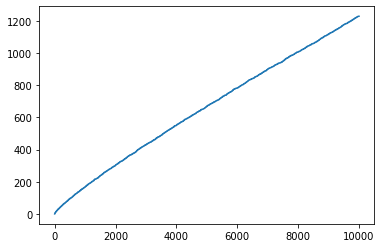

In [41]:
import matplotlib.pyplot as plt

plt.plot(list(n_to_nr_primes_smaller.keys()), list(n_to_nr_primes_smaller.values()))